**1.** Show basic data metrics. <br>
**2.** What are the sales figures for each country? <br>
**3.** What is the average total monthly sales?  <br>
**4.** What is the overall sales trend? <br>
**5.** How many new customers are acquired each month? <br>
**6.** Which customers placed the largest orders?  <br>
**7.** How do the number of invoices and total sales differ by day of the week? <br>
**8.** How do the number of average sales differ by day of the month? <br>
**9. EXTRAS**  <br>

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
C1, C2, C3, C4, FC = '#fe4b87', '#f8ce51', '#469eec', '#3c8ffa', '#f5f5f5' 
alpha, alpha2 = 0.3, 0.1

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**READ DATA**

In [3]:
data = pd.read_csv('data/online_retail_II_clean.csv', parse_dates=['InvoiceDate'])
data_backup = data.copy()
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10


In [4]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Day of Week'] = data['InvoiceDate'].dt.strftime('%a')

display(data.sample(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Year,Month,Day,Day of Week
84305,551842,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-05-04 13:52:00,0.85,16678,United Kingdom,20.40,2011,5,4,Wed
4829,537199,22585,PACK OF 6 BIRDY GIFT TAGS,2,2010-12-05 14:06:00,1.25,15894,United Kingdom,2.50,2010,12,5,Sun
185048,568235,22562,MONSTERS STENCIL CRAFT,12,2011-09-26 11:39:00,1.25,13410,United Kingdom,15.00,2011,9,26,Mon


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**1. Basic Data Metrics**

In [5]:
df1 = data[['Invoice', 'StockCode', 'Customer ID', 'Country']].nunique().to_frame()
df2 = data[['Invoice', 'StockCode', 'Customer ID', 'Country']].mode().T
df = pd.concat([df1.T, df2.T])
df.index= ['Uniqe Counts', 'Mode']
display(df)

,Invoice,StockCode,Customer ID,Country
Uniqe Counts,16084,2515,4131,37
Mode,576339,20725,17841,United Kingdom


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [6]:
df = data[['Quantity', 'Price', 'Total']].agg(['min', 'max', 'mean', 'std'])
display(df.T)

,min,max,mean,std
Quantity,1.00,27.00,7.19,6.48
Price,0.06,7.50,2.11,1.49
Total,0.06,37.20,11.01,8.20


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [7]:
print('oldest:', data['InvoiceDate'].min().strftime('%d.%m.%Y'))  # '%d-%b-%Y - %a'
print('newest:', data['InvoiceDate'].max().strftime('%d.%m.%Y'))

oldest: 01.12.2010
newest: 09.12.2011


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**2. What are the sales figures for each country?**

In [8]:
df = data.groupby('Country')['Total'].agg(['sum'])
df.columns = ['Total Revenue']
df['% Total Revenue'] = df['Total Revenue'] / df['Total Revenue'].sum() * 100
df.nlargest(5, columns='Total Revenue').T

Country,United Kingdom,Germany,France,EIRE,Spain
Total Revenue,"2,755,300.34","105,296.58","96,599.03","75,777.16","24,652.21"
% Total Revenue,85.88,3.28,3.01,2.36,0.77


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

 **3. What is the average total monthly sales?**

In [9]:
df = data.groupby(['Year', 'Month'])['Total'].agg(['count', 'sum', 'mean']).reset_index()
df.columns = ['Year', 'Month', 'Total Sales Count', 'Total Revenue', 'Average Revenue']
df['Month'] = pd.to_datetime(df['Month'],format='%m').dt.strftime('%B')

display(df.nlargest(3, columns='Average Revenue'))
print('Overall Average Monthly Sales:',  df['Average Revenue'].mean().round(2))

,Year,Month,Total Sales Count,Total Revenue,Average Revenue
9,2011,September,29898,"359,809.89",12.03
5,2011,May,20179,"242,057.63",12.00
8,2011,August,19720,"233,973.53",11.86


Overall Average Monthly Sales: 11.11


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**4. What is the overall sales trend?**

Date,Dec - 10,Jan - 11,Feb - 11,Mar - 11,Apr - 11,May - 11,Jun - 11,Jul - 11,Aug - 11,Sep - 11,Oct - 11,Nov - 11,Dec - 11
Total Revenue,"193,375.02","167,907.48","162,486.24","215,878.01","184,125.51","242,057.63","218,623.68","213,828.82","233,973.53","359,809.89","404,783.15","482,047.34","129,436.85"


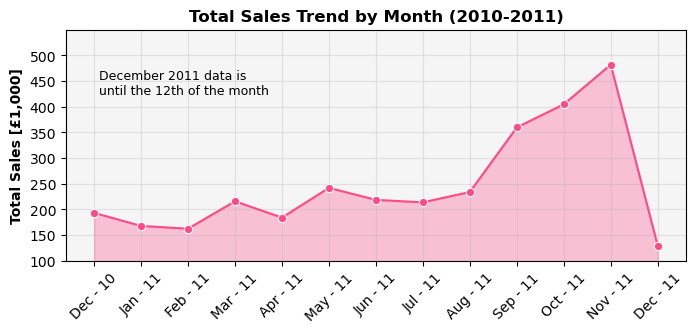

In [10]:
df = data.groupby(['Year', 'Month'])['Total'].agg(['sum'])
df.columns = ['Total Revenue']
df.reset_index(inplace=True)

df['Date'] = df['Year'].astype('str') + ' - ' + df['Month'].astype('str')
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'] = df['Date'].dt.strftime('%b - %y')

df.drop(columns=['Year', 'Month'], inplace=True)
df.set_index('Date', drop=True, inplace=True)
display(df.T)


sns.lineplot(df, x=df.index, y='Total Revenue', marker='o', color=C1)
plt.fill_between(x=df.index, y2=df['Total Revenue'], y1=0, color=C1, alpha=alpha)

plt.xticks(df.index, rotation=45)
plt.yticks(range(100000, 500001, 50000), range(100, 501, 50))
plt.ylim(100000, 550000)

plt.title('Total Sales Trend by Month (2010-2011)', fontweight='bold')
plt.ylabel('Total Sales [£1,000]', fontweight='bold')
plt.xlabel(None)

text = 'December 2011 data is \nuntil the 12th of the month'
plt.text(x=0.1, y=425000, s=text, fontsize=9)

plt.grid(alpha=alpha)
plt.gcf().set_size_inches(8,3)
plt.gca().set_facecolor(FC)

plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**5. How many new customers are acquired each month?**

Date,Dec - 10,Jan - 11,Feb - 11
Customer Count,812,685,675
New Customer Count,812,396,346
Total New Customer Count,812,1208,1554


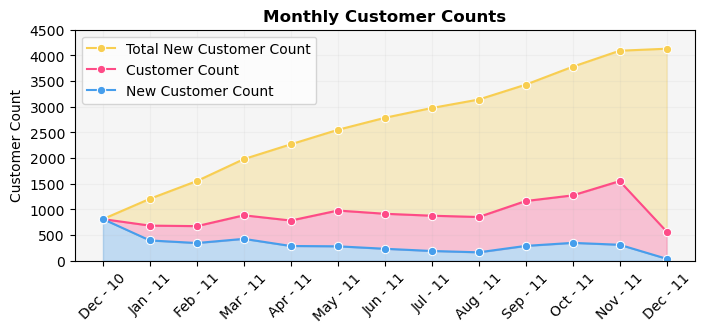

In [11]:
df = data.groupby(['Year', 'Month'])['Customer ID'].agg(['unique', 'nunique'])
df.reset_index(inplace=True)

df['Date'] = df['Year'].astype('str') + ' - ' + df['Month'].astype('str')
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'] = df['Date'].dt.strftime('%b - %y')
df.drop(columns=['Year', 'Month'], inplace=True)

df.set_index('Date', drop=True, inplace=True)
# display(df.head(3))

old = set()
def get_new_customer_count(customers):
    customers = set(customers)   
    new = customers.difference(old)
    old.update(customers)
    return len(new)

df['New Customer Count'] = df['unique'].map(get_new_customer_count)
df['Total New Customer Count'] = df['New Customer Count'].cumsum()

df.drop(columns='unique', inplace=True)
df.rename(columns={'nunique':'Customer Count'}, inplace=True)
display(df.head(3).T)

sns.lineplot(df, x=df.index, y='Total New Customer Count', marker='o', color=C2, label='Total New Customer Count')
sns.lineplot(df, x=df.index, y='Customer Count', marker='o', color=C1, label='Customer Count')
sns.lineplot(df, x=df.index, y='New Customer Count', marker='o', color=C3, label='New Customer Count')

plt.fill_between(x=df.index, y2=df['Total New Customer Count'], y1=df['Customer Count'], color=C2, alpha=alpha)
plt.fill_between(x=df.index, y2=df['Customer Count'], y1=df['New Customer Count'], color=C1, alpha=alpha)
plt.fill_between(x=df.index, y2=df['New Customer Count'], y1=0, color=C3, alpha=alpha)


plt.xticks(df.index, rotation=45)
plt.yticks(range(0, 4501, 500))
plt.ylim(0, 4500)

plt.title('Monthly Customer Counts', fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel(None)

plt.grid(alpha=alpha2)
plt.gcf().set_size_inches(8,3)
plt.gca().set_facecolor(FC)

plt.legend()
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**6. Which customers placed the largest orders?**

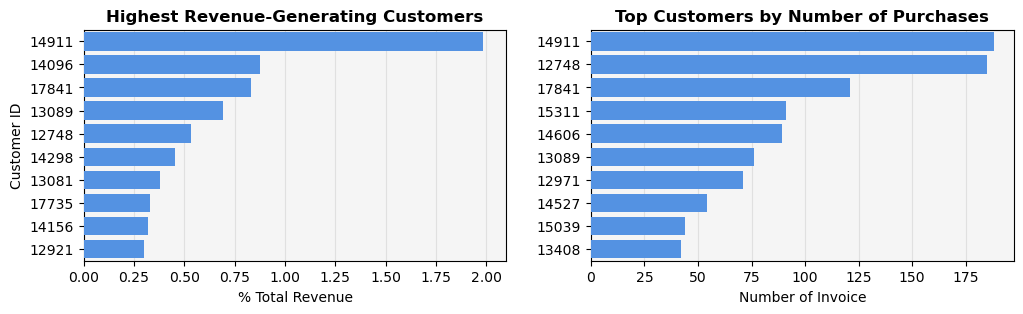

In [12]:
df = data.groupby(['Customer ID']).agg({'Invoice': 'nunique', 'Total': 'sum'})
df.columns = ['Number of Invoice', 'Total Revenue']
df['% Total Revenue'] = df['Total Revenue'] / df['Total Revenue'].sum() * 100

df1 = df.nlargest(10, columns='% Total Revenue')
df2 = df.nlargest(10, columns='Number of Invoice')
# display(df1, df2)


fig, axs = plt.subplots(1, 2, figsize=(12,3))
sns.barplot(df1, x='% Total Revenue', y=df1.index, order=df1.index, orient='h', color=C4, zorder=4, ax=axs[0])
sns.barplot(df2, x='Number of Invoice', y=df2.index, order=df2.index, orient='h', color=C4, zorder=4, ax=axs[1])

axs[0].set_title('Highest Revenue-Generating Customers', fontweight='bold')
axs[1].set_title('Top Customers by Number of Purchases', fontweight='bold')
axs[0].set_ylabel('Customer ID')
axs[1].set_ylabel(None)

axs[0].set_xlim(0, 2.1)

axs[0].grid(axis='x', alpha=alpha, zorder=0)
axs[1].grid(axis='x', alpha=alpha, zorder=0)
axs[0].set_facecolor(FC)
axs[1].set_facecolor(FC)

plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**7. How do the number of invoices and total sales differ by day of the week?**

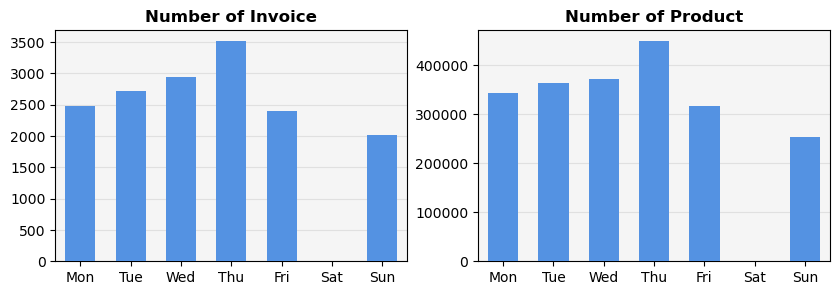

In [13]:
df = data.groupby(['Day of Week']).agg({'Invoice': 'nunique', 'Quantity':'sum'})
df.columns = ['Number of Invoice', 'Total Sales Count']
# display(df)

fig, axs = plt.subplots(1,2, figsize=(10,3))

order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(df, y='Number of Invoice', x=df.index, order=order, width=0.6, color=C4, zorder=4, ax=axs[0])
sns.barplot(df, y='Total Sales Count', x=df.index, order=order, width=0.6, color=C4, zorder=4, ax=axs[1])

axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[0].set_ylabel(None)
axs[1].set_ylabel(None)
axs[0].set_title('Number of Invoice', fontweight='bold')
axs[1].set_title('Number of Product', fontweight='bold')

axs[0].grid(axis='y', alpha=alpha, zorder=0)
axs[1].grid(axis='y', alpha=alpha, zorder=0)
axs[0].set_facecolor(FC)
axs[1].set_facecolor(FC)

plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**8. How do the number of average sales differ by day of the month?**

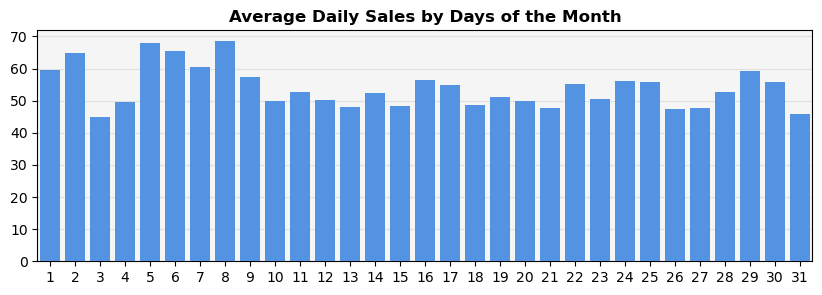

In [14]:
df = data.groupby(['Day']).agg({'Invoice': 'nunique', 'Month':'nunique'})
df.columns = ['Number of Invoice', 'Month Count']
df['Average'] = df['Number of Invoice'] / df['Month Count']
# display(df)


sns.barplot(df, y='Average', x=df.index, color=C4, zorder=4)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Average Daily Sales by Days of the Month', fontweight='bold')

plt.grid(axis='y', alpha=alpha, zorder=0)
plt.gcf().set_size_inches(10,3)
plt.gca().set_facecolor(FC)

plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**9. EXTRAS**

In [15]:
df = data.groupby(['StockCode']).agg({'Invoice': 'nunique', 'Quantity':'sum', 'Total': 'sum'})
df.reset_index(inplace=True)
df.columns = ['StockCode', 'Invoice Count', 'Total Sales', 'Total Revenue']

df['% Total Revenue'] = df['Total Revenue'] / df['Total Revenue'].sum() * 100
df['Mean Price'] = df['Total Revenue'] / df['Total Sales'] # Products do not have a fixed price
df['Average Orders per Invoice'] = df['Total Sales'] / df['Invoice Count']

display(df.sample(3))
display(df.drop(columns='StockCode').agg(['median', 'mean', 'std', 'min', 'max']))

,StockCode,Invoice Count,Total Sales,Total Revenue,% Total Revenue,Mean Price,Average Orders per Invoice
177,20906,2,3,8.85,0.00,2.95,1.50
1715,23127,158,428,"2,118.60",0.07,4.95,2.71
2380,85016,22,186,240.60,0.01,1.29,8.45


,Invoice Count,Total Sales,Total Revenue,% Total Revenue,Mean Price,Average Orders per Invoice
median,63.00,377.00,554.58,0.02,1.65,5.86
mean,114.18,833.58,"1,275.68",0.04,2.13,6.77
std,145.91,"1,234.06","1,972.08",0.06,1.61,4.46
min,1.00,1.00,0.38,0.00,0.08,1.00
max,"1,175.00","14,986.00","17,251.52",0.54,7.50,25.00


<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Products whose price changes </p>

In [16]:
# data.groupby('StockCode')['Price'].nunique().value_counts()
data.groupby('StockCode')['Price'].agg(['nunique', 'unique']).nlargest(3, columns='nunique')

,nunique,unique
StockCode,,
22558,6,"[1.49, 1.25, 1.65, 1.0, 1.45, 3.29]"
20712,5,"[1.95, 1.65, 2.08, 4.13, 1.79]"
20713,5,"[1.95, 1.65, 2.08, 4.13, 1.79]"


<p style="background-image: linear-gradient(to right, #ee2965, #e31837)"> &nbsp; </p>

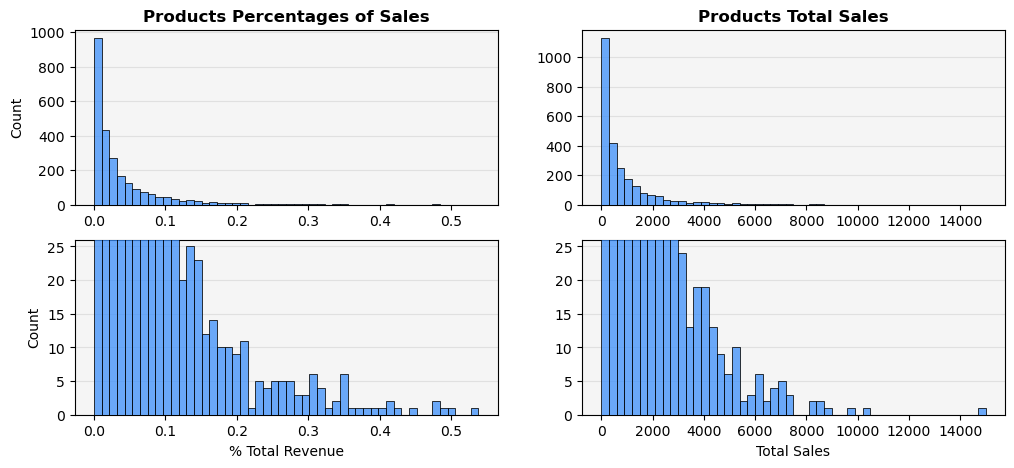

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12,5))

sns.histplot(df['% Total Revenue'], bins=50, color=C4, zorder=4, ax=axs[0,0])
sns.histplot(df['% Total Revenue'], bins=50, color=C4, zorder=4, ax=axs[1,0])
sns.histplot(df['Total Sales'], bins=50, color=C4, zorder=4, ax=axs[0,1])
sns.histplot(df['Total Sales'], bins=50, color=C4, zorder=4, ax=axs[1,1])

axs[0,0].set_title('Products Percentages of Sales', fontweight='bold')
axs[1,0].set_ylim(0, 26)
axs[0,0].set_xlabel(None)

axs[0,1].set_title('Products Total Sales', fontweight='bold')
axs[1,1].set_ylim(0, 26)
axs[0,1].set_xlabel(None)
axs[0,1].set_ylabel(None)
axs[1,1].set_ylabel(None)

axs[0,0].set_facecolor(FC)
axs[0,1].set_facecolor(FC)
axs[1,1].set_facecolor(FC)
axs[1,0].set_facecolor(FC)
axs[0,0].grid(axis='y', alpha=alpha, zorder=0)
axs[1,0].grid(axis='y', alpha=alpha, zorder=0)
axs[0,1].grid(axis='y', alpha=alpha, zorder=0)
axs[1,1].grid(axis='y', alpha=alpha, zorder=0)

plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> &nbsp; </p>

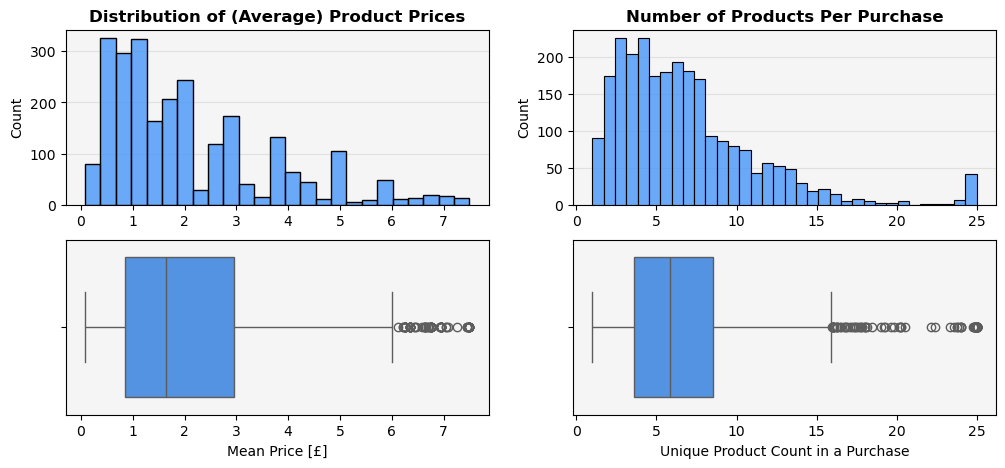

In [18]:
fig, axs = plt.subplots(2,2, figsize=(12,5))

sns.histplot(df['Mean Price'], color=C4, zorder=4, ax=axs[0,0])
sns.boxplot(x=df['Mean Price'], color=C4, ax=axs[1,0])
sns.histplot(df['Average Orders per Invoice'], color=C4, zorder=4, ax=axs[0,1])
sns.boxplot(x=df['Average Orders per Invoice'], color=C4, ax=axs[1,1])

axs[0,0].set_title('Distribution of (Average) Product Prices', fontweight='bold')
axs[0,1].set_title('Number of Products Per Purchase', fontweight='bold')

axs[0,0].set_xlabel(None)
axs[0,1].set_xlabel(None)
axs[1,0].set_xlabel('Mean Price [£]')
axs[1,1].set_xlabel('Unique Product Count in a Purchase')

axs[0,0].grid(axis='y', alpha=alpha, zorder=0)
axs[0,1].grid(axis='y', alpha=alpha, zorder=0)
axs[0,0].set_facecolor(FC)
axs[1,0].set_facecolor(FC)
axs[0,1].set_facecolor(FC)
axs[1,1].set_facecolor(FC)

plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> &nbsp; </p>

In [19]:
_1 = df.nsmallest(2, columns='Total Sales')                # Products with the lowest total sales count
_2 = df.nlargest(2, columns='Total Sales')                 # Products with the highest total sales count.
_3 = df.nsmallest(2, columns='Total Revenue')              # Products that generated the least total revenue.
_4 = df.nlargest(2, columns='Total Revenue')               # Products that generated the most total revenue.
_5 = df.nsmallest(2, columns='Average Orders per Invoice') # Products with the least average sales per order
_6 = df.nlargest(2, columns='Average Orders per Invoice')  # Products with the most average sales per order

print('\nLowest and Highest Total Sales Count')
display(pd.concat([_1, _2]))
print('\nLowest and Highest Total Revenue')
display(pd.concat([_3, _4]))
print('\nLowest and Highest Orders per Invoice')
display(pd.concat([_5, _6]))
print('\nProduct details for generated the most total revenue')
display(data[data['StockCode'].isin(_4['StockCode'])].drop_duplicates(subset=['Description'], keep='last'))


Lowest and Highest Total Sales Count


,StockCode,Invoice Count,Total Sales,Total Revenue,% Total Revenue,Mean Price,Average Orders per Invoice
57,20667,1,1,2.95,0.00,2.95,1.00
81,20703,1,1,4.25,0.00,4.25,1.00
337,21212,924,14986,"8,277.68",0.26,0.55,16.22
2348,84879,988,10208,"17,251.52",0.54,1.69,10.33



Lowest and Highest Total Revenue


,StockCode,Invoice Count,Total Sales,Total Revenue,% Total Revenue,Mean Price,Average Orders per Invoice
1310,22610,1,2,0.38,0.00,0.19,2.00
2267,84227,1,1,0.42,0.00,0.42,1.00
2348,84879,988,10208,"17,251.52",0.54,1.69,10.33
94,20725,1175,9655,"15,995.15",0.50,1.66,8.22



Lowest and Highest Orders per Invoice


,StockCode,Invoice Count,Total Sales,Total Revenue,% Total Revenue,Mean Price,Average Orders per Invoice
53,20663,3,3,11.69,0.00,3.90,1.00
56,20666,4,4,11.80,0.00,2.95,1.00
306,21167,11,275,57.75,0.00,0.21,25.00
506,21495,143,3575,"1,501.50",0.05,0.42,25.00



Product details for generated the most total revenue


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Year,Month,Day,Day of Week
291235,581538,20725,LUNCH BAG RED RETROSPOT,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,2011,12,9,Fri
291359,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-12-09 12:31:00,1.69,15804,United Kingdom,27.04,2011,12,9,Fri


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>